# Lesson 10: Visualization Final Project

This is a beginner tutorial about **applying dim redux to images** by converting them to numerical values.  

As we know, images are understood as matrices of numbers by computers.  
This means we can apply our dim redux techniques learned up until this point. 

We will use images that represent numbers.  

This dataset comes from a pre-loaded packages in sklearn called 'load_digits'.  

**GOAL** is to divide these images into 10 classes, one for each digit 0-9.


# Imports

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Get Data

In [19]:
# This is that pre-existing dataset from package. 


# this option here is so we get the relevant data (structures) returned separately. 
# this is referring to features and targets/values.
# X = samples with raw data / features
# y = targets / interpretations of each sample.
X, y = load_digits(return_X_y=True)

# 1797 samples with 64 features. 64 = 8x8 image.
X.shape 

# 1797 "responses"
y.shape

(1797,)

# EDA

y interpreted value: 4


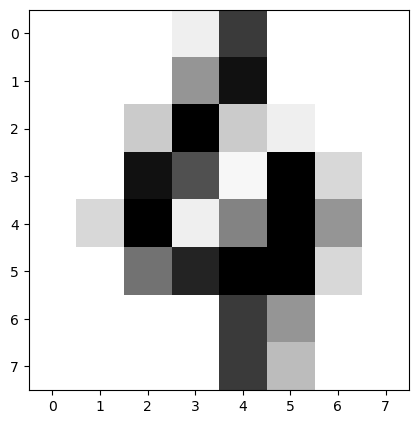

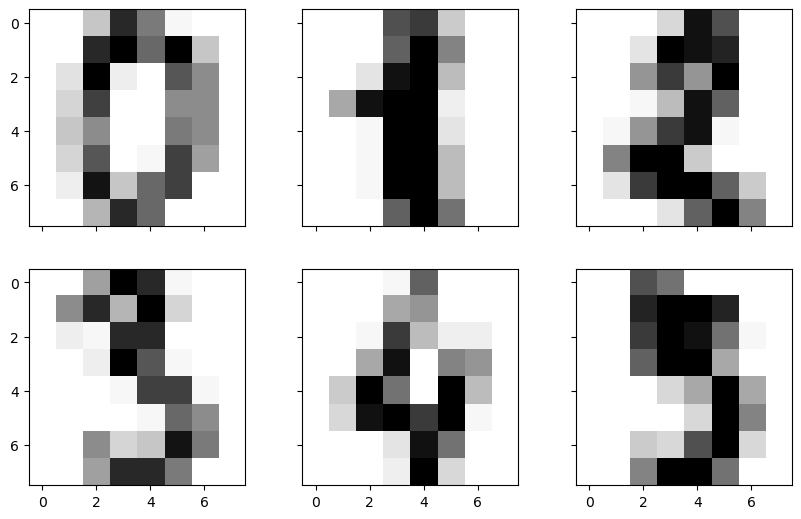

In [48]:
figure = plt.figure(figsize=(8, 8/1.618))

# Plot just one image.
image = 100
plt.imshow(X[image].reshape(8, 8), cmap="Greys")
print(f"y interpreted value: {y[image]}")

# Plot a few images.
# All pots share same axis. Means plots do not have independent axes.
fig, axes = plt.subplots(
    nrows=2, ncols=3, sharex=True, sharey=True, 
    figsize=(10, 10 / 1.618)
)

# I'm walking through these in a 'diagnolized' sense.
for image in range(2 * 3):
    row = image // 3
    col = image % 3
    axes[row, col].imshow(X[image].reshape(8,8), cmap="Greys")

# Dim Redux

Dimensionality reduction here is applied via multiple algorithms.  

What are the features? These are the 8 x 8 columns telling us the value of grey-scale hue used at a particular location.  

Any of these techniques will be looking to reduce the number of features (pixels) used to represent the image.

# Applying Fisher Discriminant Analysis

## 2 Dims 

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


# Get Data
# X is our df
df = pd.DataFrame(X)

# Standardize data
df_std = df.copy(deep=True)
df_std[df.columns]= StandardScaler().fit_transform(df_std)
df_std.describe().T

# Fisher Dim Redux
fisher = LinearDiscriminantAnalysis(n_components=2)
X_fisher = fisher.fit_transform(df_std.values, y=y)
df_fish_2d = pd.DataFrame({"FISH1": X_fisher[:,0], "FISH2": X_fisher[:,1], "class": y})
df_fish_2d

,FISH1,FISH2,class
0,-2.014632,-5.623486,0
1,0.220967,3.592400,1
2,2.234855,2.709504,2
3,2.760965,-0.624427,3
4,-5.845449,1.754015,4
...,...,...,...
1792,1.213858,-2.473313,9
1793,-2.456013,-4.420402,0
1794,-1.046972,1.483677,8
1795,0.407873,-1.991673,9


## Plotting

<Axes: xlabel='FISH1', ylabel='FISH2'>

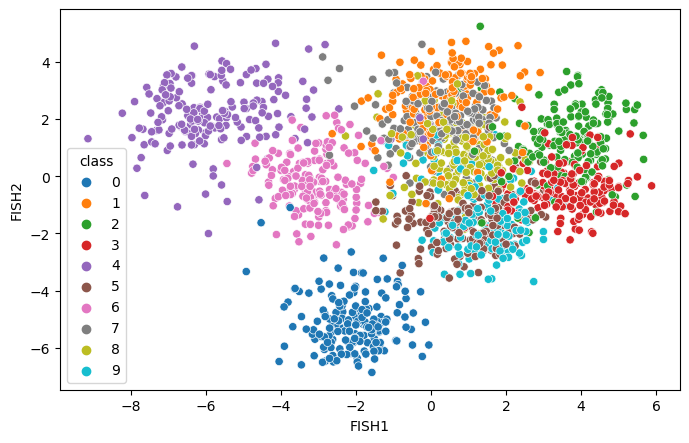

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(8, 8 / 1.618))

sns.scatterplot(x="FISH1", y="FISH2", hue="class", data=df_fish_2d, palette="tab10")

## Discussion

You can see values like '4' and '0' have a distinct clustering with little overlap to other values. Couples like '9' and '5' or '7' and '1' have significant overlap. Intuitively, this means 9 and 5 can be difficult to distinguish between (similarly to 7 and 1) in this hand-writtne dataset. This makes sense. How many times have I confused a 9 and 5 or a 1 and a 7 because they are similarly shaped when hand-written? I have almost never confused a 4 and a 0. 

## 3 Dims

In [ ]:
# Get data
df = pd.DataFrame(X)

# Standardize data
df_std = df.copy(deep=True)
df_std[df.columns] = StandardScaler().fit_transform(df_std)
df_std.describe().T

fisher = LinearDiscriminantAnalysis(n_components=3)
X_fisher = fisher.fit_transform(df_std.values, y=y)
df_fish_3d = pd.DataFrame(
    {
        "FISH1": X_fisher[:,0],
        "FISH2": X_fisher[:,1],
        "FISH3": X_fisher[:,2],
        "class": y
    }
)

## Plotting

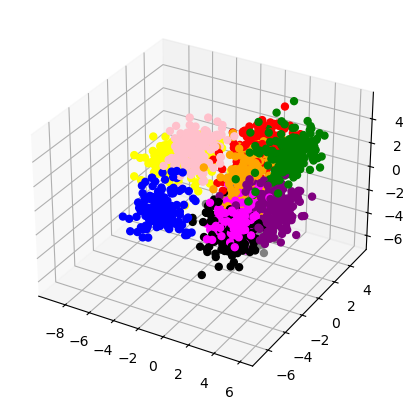

In [109]:
import plotly.express as px

figure = plt.figure(figsize=(8, 8 / 1.618))
ax = plt.subplot(111, projection="3d")

color_map = {0: "blue", 1: "red", 2: "green", 3: "purple", 4: "yellow", 5: "black", 6: "pink", 7: "grey", 8: "orange", 9: "magenta"}

plt.scatter(
    x=df_fish_3d["FISH1"], y=df_fish_3d["FISH2"], zs=df_fish_3d["FISH3"],
    depthshade=False, s=25, c=df_fish_3d["class"].apply(lambda x: color_map[x])
)
plt.show()

px.scatter_3d(df_fish_3d, x="FISH1", y="FISH2", z="FISH3", color="class", size_max=1)